In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw04.ok')

Assignment: Homework 4: Functions, Histograms, and Groups
OK, version v1.18.1



# Homework 4: Functions, Histograms, and Groups

**Reading**: 

* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/visualizing-numerical-distributions.html) 
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/functions-and-tables.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 4 is due Sunday, 7/5 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule.
Late work will not be accepted as per the [policies](http://data8.org/su20/policies.html) of this course. 

**Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw04.ok')

Assignment: Homework 4: Functions, Histograms, and Groups
OK, version v1.18.1



Before continuing the assignment, select "Save and Checkpoint" in the File menu and then execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to okpy.org and flag the correct version. There will be another submit cell at the end of the assignment when you finish!

In [3]:
# _ = ok.submit()

## 1. Burrito-ful San Diego

Tam, Margaret and Winifred are trying to use Data Science to find the best burritos in San Diego! Their friends Irene and Maya provided them with two comprehensive datasets on many burrito establishments in the San Diego area taken from (and cleaned from): https://www.kaggle.com/srcole/burritos-in-san-diego/data

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their Overall rating. It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [4]:
#Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)
burritos_types = Table.read_table("burritos_types.csv")
burritos_types.show(5)

Name,Yelp,Google,Overall
Albertacos,3.5,3.9,3.45
Burrito Factory,4.5,4.8,3.5
Burros and Fries,3.5,4.1,3.575
Caliente Mexican Food,3.5,4.4,3.25
California Burrito Company,3.5,4.4,3.2


Name,Menu_Item,Cost
Albertacos,California,5.7
Albertacos,Carne asada,5.25
"Alberto's 623 N Escondido Blvd, Escondido, CA 92025",Carne Asada,4.59
Burrito Box,Steak with guacamole,11.5
Burrito Factory,Steak everything,7.35


**Question 1.** It would be easier if we could combine the information in both tables. Assign `burritos` to the result of joining the two tables together.

*Note: it doesn't matter which table you put in as the argument to the table method, either order will work for the autograder tests.*

*Hint: If you need refreshers on table methods, look at the [python reference](http://data8.org/sp20/python-reference.html).*

<!--
BEGIN QUESTION
name: q1_1
-->

In [5]:
burritos = burritos_types.join('Name', ratings, 'Name')
burritos.show(5)

Name,Menu_Item,Cost,Yelp,Google,Overall
Albertacos,California,5.7,3.5,3.9,3.45
Albertacos,Carne asada,5.25,3.5,3.9,3.45
Burrito Factory,Steak everything,7.35,4.5,4.8,3.5
Burros and Fries,California,7.19,3.5,4.1,3.575
Burros and Fries,Carne asada,6.89,3.5,4.1,3.575


In [6]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. First, assign `yelp_and_google` to a table only containing the columns `Yelp` and `Google`. Then, make a scatter plot with Yelp scores on the x-axis and the Google scores on the y-axis. 

<!--
BEGIN QUESTION
name: q1_2
manual: True
-->
<!-- EXPORT TO PDF -->

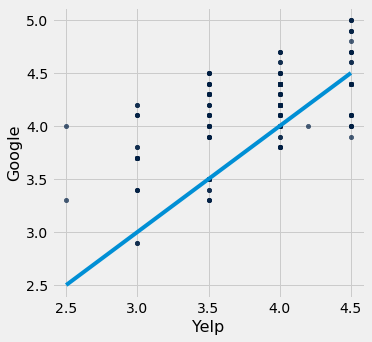

In [10]:
yelp_and_google = burritos.select('Yelp', 'Google')
yelp_and_google.scatter('Yelp', 'Google')
# Don't change/edit/remove the following line.
# To help you make conclusions, we have plotted a straight line on the graph (y=x)
plt.plot(np.arange(2.5,5,.5), np.arange(2.5,5,.5));

In [11]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Looking at the scatter plot you just made in Question 1.2, do you notice any pattern(s) (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe them **briefly** in the cell below.

<!--
BEGIN QUESTION
name: q1_3
manual: True
-->
<!-- EXPORT TO PDF -->

It seems that Google scores are higher then Yelp's when Yelp score is < 4.0.
At 4.5 in Yelp, Google scores seem to have higher variation.

Here's a refresher on how `.group` works! You can read how `.group` works in the [textbook](https://www.inferentialthinking.com/chapters/08/2/Classifying_by_One_Variable.html), or you can view the video below. The video resource was made by a past staff member - Divyesh Chotai!

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("HLoYTCUP0fc")

**Question 4.** From the `burritos` table, some of the restaurant locations have multiple reviews. Winifred thinks California burritos are the best type of burritos, and wants to see the average overall rating for California burritos at each location. Create a table that has two columns: the name of the restaurant and the average overall rating of California burritos at each location.

*Tip: Revisit the burritos table to see how California burritos are represented by 'California' as a Menu_Item. And remember there are multiple lines of ratings of 'California burritos' so think about what method you might need to use.*

*Note: you can break up the solution into multiple lines, as long as you assign the final output table to `california_burritos`! For reference however, the staff solution only used one line.*

<!--
BEGIN QUESTION
name: q1_4
-->

In [17]:
california_burritos = burritos.where('Menu_Item', 'California')
california_burritos = california_burritos.select('Name', 'Overall')
california_burritos = california_burritos.group('Name', max)
california_burritos

Name,Overall max
Burros and Fries,3.575
Caliente Mexican Food,3.25
California Burrito Company,3.2
Cancun Mexican & Seafood,4.1
Cotixan,3.6
Don Carlos Taco Shop,3.3
El Dorado Mexican Food,4.025
El Indio,4
El Pueblo Mexican Food,4.3
El Zarape,3.54815


In [18]:
ok.grade("q1_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Given this new table `california_burritos`, Winifred can figure out the name of the restaurant with the highest overall average rating! Assign `best_restaurant` to a line of code that evaluates to a string that corresponds to the name of the restaurant with the highest overall average rating. 

<!--
BEGIN QUESTION
name: q1_5
-->

In [28]:
best_restaurant = california_burritos.sort('Overall max', descending=True)
best_restaurant = str(best_restaurant.column('Name')[0])
best_restaurant

'Mikes Taco Club'

In [29]:
ok.grade("q1_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Using the `burritos` table, assign `menu_average` to a table that has three columns that uniquely pairs the name of the restaurant, the menu item featured in the review, and the average Overall score for that menu item at that restaurant.

*Hint: Use .group, and remember that you can group by multiple columns. Here's an example from the [textbook](https://www.inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html)*.

<!--
BEGIN QUESTION
name: q1_6
-->

In [31]:
menu_average = burritos.select('Name', 'Menu_Item', 'Overall')
menu_average = menu_average.group(['Name', 'Menu_Item'], max)
menu_average

/home/julio/Projects/materials-su20/.venv/lib/python3.6/site-packages/datascience/tables.py:630: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Name,Menu_Item,Overall max
Albertacos,California,3.45
Albertacos,Carne asada,3.45
Burrito Factory,Steak everything,3.5
Burros and Fries,California,3.575
Burros and Fries,Carne asada,3.575
Burros and Fries,Shrimp california,3.575
Caliente Mexican Food,California,3.25
Caliente Mexican Food,carne asada,3.25
Caliente Mexican Food,fried fish,3.25
California Burrito Company,California,3.2


In [32]:
ok.grade("q1_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7.** Tam thinks that burritos in San Diego are cheaper (and taste better) than the burritos in Berkeley. Plot a histogram that visualizes that distribution of the costs of the burritos from San Diego in the `burritos` table. Also use the provided `bins` variable when making your histogram, so that visually the histogram is more informative.

<!--
BEGIN QUESTION
name: q1_7
manual: True
-->
<!-- EXPORT TO PDF -->

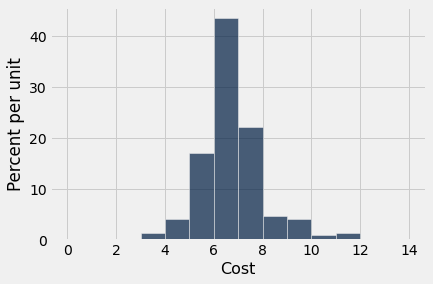

In [33]:
bins = np.arange(0, 15, 1)
# Please also use the provided bins
burritos.hist('Cost', bins=bins)

## 2. Faculty salaries


This exercise is designed to give you practice using the Table methods `pivot` and `group`. [Here](http://data8.org/sp20/python-reference.html) is a link to the Python reference page in case you need a quick refresher.

Run the cell below to view a demo on how you can use pivot on a table. (Thank you to past staff Divyesh Chotai)

In [22]:
from IPython.display import YouTubeVideo
YouTubeVideo("4WzXo8eKLAg")

In the next cell, we load a dataset created by the [Daily Cal](http://projects.dailycal.org/paychecker/) which contains Berkeley faculty, their departments, their positions, and their gross salaries in 2015.

In [34]:
raw_profs = Table.read_table("faculty.csv").where("year", are.equal_to(2015)).drop("year", "title")
profs = raw_profs.relabeled("title_category", "position")
profs

name,department,position,gross_salary
CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450
PIETER ABBEEL,Computer Science,associate professor,184998
SALLY ABEL,Law,lecturer,3466
ELIZABETH ABEL,English,professor,138775
DOR ABRAHAMSON,Education,associate professor,100300
KATHRYN ABRAMS,Law,professor,319693
BARBARA ABRAMS,Public Health,professor,191162
SARAH ACCOMAZZO,Social Welfare,lecturer,14779
CHARISMA ACEY,City and Regional Planning,assistant professor,101567
DAVID ACKERLY,Biology,professor,182288


We want to use this table to generate arrays with the names of each professor in each department.

**Question 1.** Set `prof_names` to a table with two columns. The first column should be called `department` and have the name of every department once, and the second column should be called `faculty` with each row in that second column containing an *array* of the names of all faculty members in that department. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

<!--
BEGIN QUESTION
name: q2_1
-->

In [38]:
# Pick one of the two functions defined below in your call to group.
def identity(array):
    '''Returns the array that is passed through'''
    return array 

def first(array):
    '''Returns the first item'''
    return array.item(0)

# Make a call to group using one of the functions above when you define prof_names
prof_names = profs.select('department', 'name').group('department', identity)
prof_names = prof_names.relabel('name identity', 'faculty')
prof_names

department,faculty
African American Studies,['AYA DE LEON' 'CHIYUMA ELLIOTT' 'NIKKI JONES' 'DAVID KY ...
Agricultural and Resource Economics and Policy,['MAXIMILIAN AUFFHAMMER' 'CHARLES GIBBONS' 'JEFFREY PERL ...
Anthroplogy,['SABRINA AGARWAL' 'STANLEY BRANDES' 'CHARLES BRIGGS' ' ...
Architecture,['MARK ANDERSON' 'JACOB ATHERTON' 'WILLIAM ATWOOD' 'R.GA ...
Art History,['DILIANA ANGELOVA' 'PATRICIA BERGER' 'JULIA BRYAN-WILSO ...
Art Practice,['ALLAN DESOUZA' 'AIDA GAMEZ' 'RANDY HUSSONG' 'JENNIFER ...
Astronomy,['GIBOR BASRI' 'STEVEN BECKWITH' 'LEO BLITZ' 'EUGENE CHI ...
Bioengineering,['ADAM ARKIN' 'IRINA CONBOY' 'STEVEN CONOLLY' 'JOHN DUEB ...
Biology,['DAVID ACKERLY' 'HILLEL ADESNIK' 'KELLY AGNEW' 'DORIS B ...
Buddhist Studies,['JANN RONIS']


In [39]:
ok.grade("q2_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



#### Understanding the code you just wrote in 2.1 is important for moving forward with the class! If you made a lucky guess, take some time to look at the code, step by step.

**Question 2.** At the moment, the ```name``` column of the `profs` table is sorted by last name. Would the arrays you generated in the `faculty` column of the previous part be the same if we had sorted by first name instead before generating them? Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. An example of arrays that are NOT the same: `array([1,2]) != array([2,1])`. Explain your answer.  

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->
<!-- EXPORT TO PDF -->

They would be different.
Assuming group only collects values and doesn't perform any sorting, the original order should change the result.

**Question 3.** Set `department_ranges` to a table containing departments as the rows, and the position as the columns. The values in the rows should correspond to a salary range, where range is defined as the **difference between the highest salary and the lowest salary in the department for that position**. 

*Hint:* First you'll need to define a new function `salary_range` which takes in an array of salaries and returns the range of salaries in that array. 

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [50]:
# Define salary_range first
def salary_range(salaries):
    return max(salaries) - min(salaries)

department_ranges = profs.drop('name')
department_ranges = department_ranges.pivot(
    'position',
    'department',
    'gross_salary',
    collect=salary_range
)
department_ranges

department,assistant professor,associate professor,lecturer,professor
African American Studies,128828,48814,83309,0
Agricultural and Resource Economics and Policy,0,0,0,29650
Anthroplogy,11193,103271,11131,166527
Architecture,47675,103204,72977,167892
Art History,57288,27439,31861,100894
Art Practice,0,26632,93923,0
Astronomy,0,0,0,138346
Bioengineering,5513,2794,69008,134739
Biology,209667,113341,137087,288554
Buddhist Studies,0,0,0,0


In [51]:
ok.grade("q2_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Give an explanation as to why some of the row values are `0` in the `department_ranges` table from the previous question.

<!--
BEGIN QUESTION
name: q2_4
manual: True
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## 3. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [36]:
_ = ok.submit()

In [37]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")